# Installing Libraries

In [58]:
%pip install pandas matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets

In [60]:
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin1')

# Merge datasets

In [61]:
order_details = order_details.merge(pizzas, on='pizza_id')
order_details = order_details.merge(pizza_types, on='pizza_type_id')
order_details = order_details.merge(orders, on='order_id')

In [62]:
order_details['revenue'] = order_details['quantity'] * order_details['price']
# ✅ Fix the 'date' column
order_details['date'] = pd.to_datetime(order_details['date'])

# Add month column for monthly trend
order_details['month'] = order_details['date'].dt.to_period('M')


# Total Sales per Pizza Category

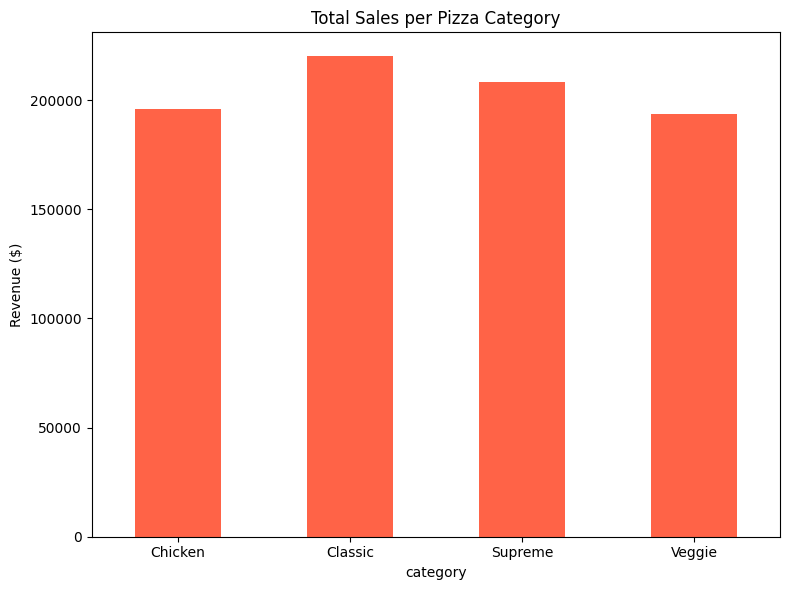

In [63]:
category_sales = order_details.groupby('category')['revenue'].sum()

plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='tomato')
plt.title("Total Sales per Pizza Category")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Top 10 Bestselling Pizzas

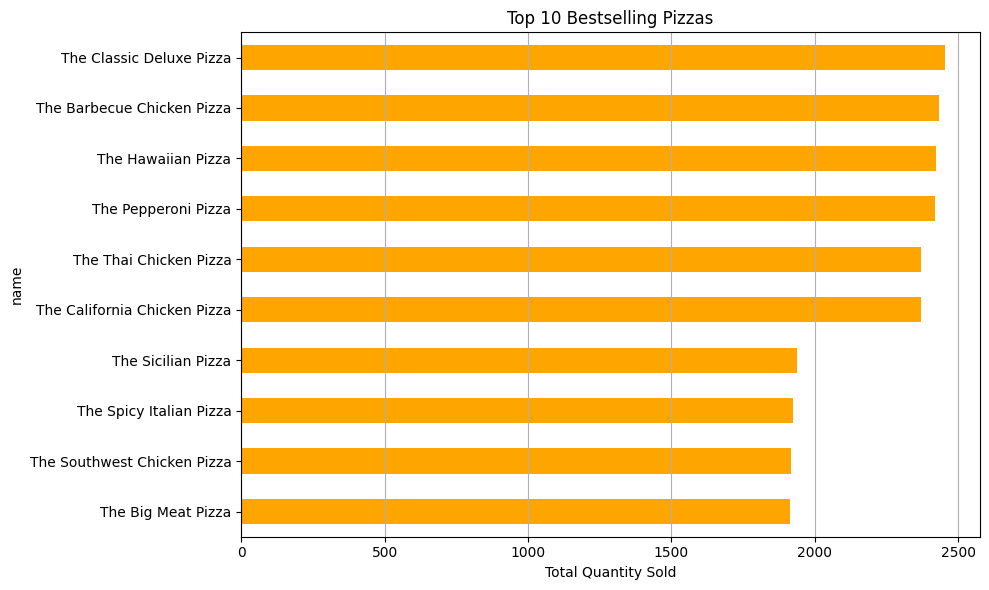

In [64]:
top_pizzas = order_details.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_pizzas.plot(kind='barh', color='orange')
plt.title("Top 10 Bestselling Pizzas")
plt.xlabel("Total Quantity Sold")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# Pizza Size Distribution


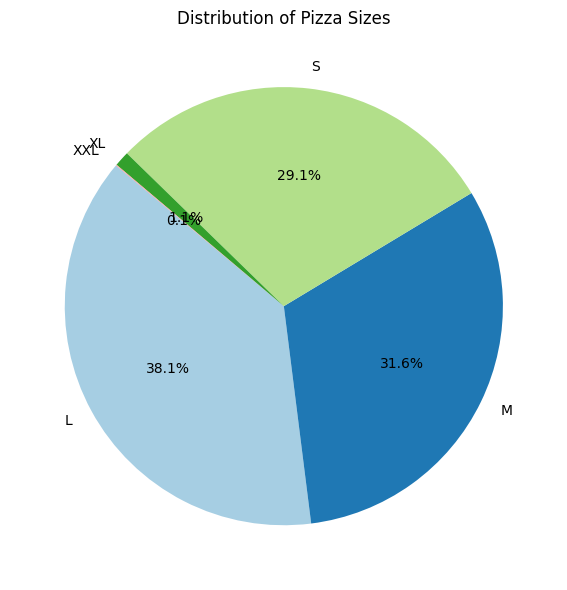

In [65]:
size_counts = order_details['size'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Pizza Sizes")
plt.tight_layout()
plt.show()

# Revenue by Pizza Size


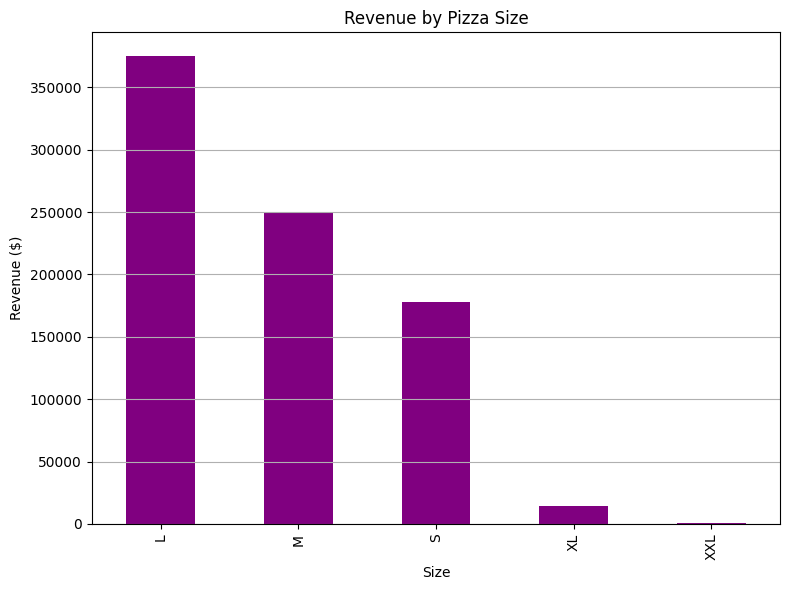

In [66]:
size_revenue = order_details.groupby('size')['revenue'].sum()

plt.figure(figsize=(8, 6))
size_revenue.plot(kind='bar', color='purple')
plt.title("Revenue by Pizza Size")
plt.xlabel("Size")
plt.ylabel("Revenue ($)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Monthly Revenue Trend

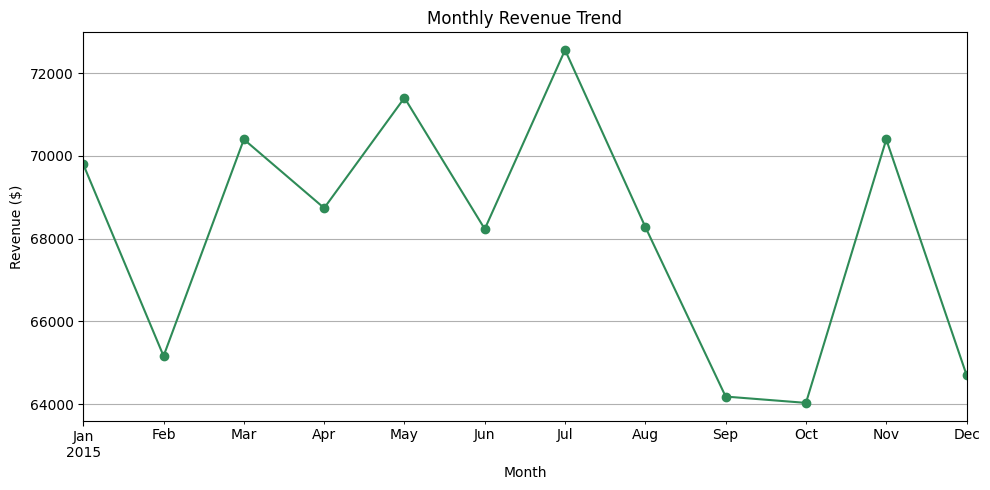

In [67]:
order_details['month'] = order_details['date'].dt.to_period('M')
monthly_revenue = order_details.groupby('month')['revenue'].sum()

plt.figure(figsize=(10, 5))
monthly_revenue.plot(marker='o', color='seagreen')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

# Daily Order Count

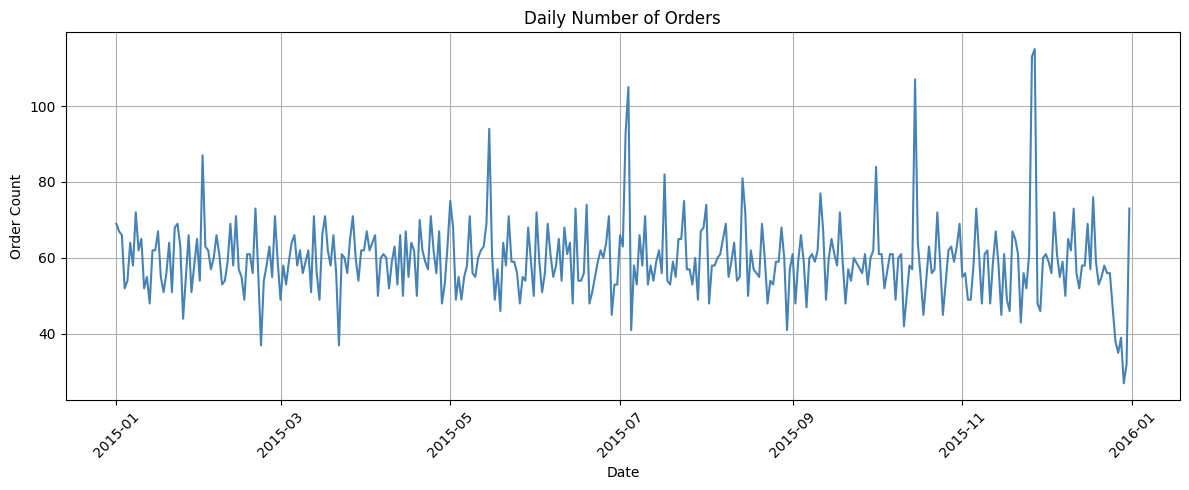

In [68]:
# ✅ Fix datetime conversion first
orders['date'] = pd.to_datetime(orders['date'])

daily_orders = orders.groupby(orders['date'].dt.date)['order_id'].nunique()

plt.figure(figsize=(12, 5))
plt.plot(daily_orders.index, daily_orders.values, color='steelblue')
plt.title("Daily Number of Orders")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
